In [2]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from kneefinder import KneeFinder
import matplotlib.pyplot as plt


In [22]:
# creating some synthetic data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

X = StandardScaler().fit_transform(X)

In [8]:
# exploring the space between 0.1 and 0.9 for the parameter 'eps'
test_eps = np.linspace(0.1, 0.9, 20)

n_clust = []
for eps in test_eps:
    db = DBSCAN(eps=eps, min_samples=10).fit(X)
    n_clust.append(len(set(db.labels_)))

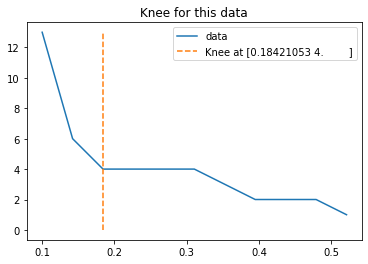

In [ ]:
kf = KneeFinder(data_x=test_eps, data_y=n_clust)

kf.plot()

In [14]:
kf.knee

array([0.18421053, 4.        ])

In [15]:
optimal_db = DBSCAN(eps=kf.knee[0], min_samples=10).fit(X)

In [20]:
labels = optimal_db.labels_
core_samples_mask = np.zeros_like(optimal_db.labels_, dtype=bool)
core_samples_mask[optimal_db.core_sample_indices_] = True

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

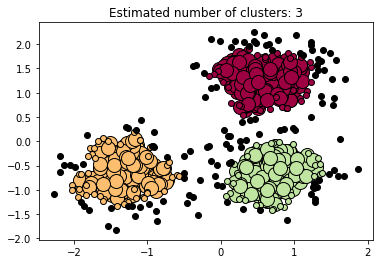

In [21]:


# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()